START NOTEBOOK

## Set-up 

In [1]:
from hydroplots import *
from leach_hydrology import *
import numpy as np

import mpld3
mpld3.enable_notebook()

# Plot graphs within this document
%matplotlib inline

# Plot graphs outside (for interaction)
# %matplotlib

from pestmob import *
from mixinglayer import *

### Pesticide, soil type and runoff calibration parameter.  

In [2]:
# Soil and pesticide
pesticide = 'S-metolachlor'
initial_condition = 'mean'
soil_type = 'Vine Soil'
soil = 'Rouff'
soil_short = 'Vine'

pesti_obs = choose_pesticide(
    pesticide,
    soil)

# Kd ranges to test
Kd_pest_sterile = pesti_obs[0]
Kd_pest_living = pesti_obs[1]

# Initial concentrations and mass out observed
pest_dict_S_1st = pesti_obs[2]
pest_dict_L_1st = pesti_obs[3]
pest_dict_S_2nd = pesti_obs[4]
pest_dict_L_2nd = pesti_obs[5]

# Assumed (used to calculate Reynolds number)
runoff_vel = 10.0  # mm/min

### Microcosm

In [3]:
d = (14.93 * 2)  # Diameter of falcon tube (mm)
area = ((d / 2) ** 2) * 3.1416  # (mm2)
soil_height1 = 20  # Mixing layer depth in mm
soil_height2 = 20  # mm

### Soil hydrological characteristics

In [4]:
if soil == 'Alteck':
    kSat = 2.24  # mm/min (13.45 cm/h - Crop Soil) 
    psi = 1100  # soil suction Alteck (mm)
    eff_height = 0.80
elif soil == 'Rouff': 
    kSat = 17.62*10/60  # mm/min (17.62 cm/h - Vine Soil) 
    psi = 1100  # soil suction Alteck (mm)
    eff_height = 0.76
    
# Soil characteristics (Equivalent for Alteck and Rouffach)
# Initial bulk density options:
pb_i0 = 0.99/10**3  # bulk density (g/cm^3) -> g/mm^3  (M. Trautmann)
pb_i1 = 2.61/10**3 # inital 1st pulse, calc. from experiment cond.
pb_i2 = 3.59/10**3 # initial 2nd pulse, calc. from experiment cond.

# Final bulk density options (1st and 2nd pulses)
pb_f1 = 3.59/10**3 # final1, calculated from experimental conditions.
pb_f2 = 3.76/10**3 # final2, calculated from experimental conditions.

### Store results

In [5]:
output_hydro_params = {
    soil_short : [{'R1_FA':[],
              'R2_ALL':[],
              'Err1':[{'Fresh':[], 'Aged':[]}],
              'Err2':[{'SF':[], 'SA':[], 'LF':[], 'LA':[]}],
              'Ksat2':[{'SF':[], 'SA':[], 'LF':[], 'LA':[]}]
             }]
    }

In [6]:
output_pesti_params = {
    soil_short: {'R1': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'R2': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'Err1': {'SF': [], 'SA': [], 'LF': [], 'LA': [],
                          'SFmax': [], 'SAmax': [], 'LFmax': [], 'LAmax': [],
                          'SFmin': [], 'SAmin': [], 'LFmin': [], 'LAmin': []},
                 'Err2': {'SF': [], 'SA': [], 'LF': [], 'LA': [],
                          'SFmax': [], 'SAmax': [], 'LFmax': [], 'LAmax': [],
                          'SFmin': [], 'SAmin': [], 'LFmin': [], 'LAmin': []},
                 'Koc1': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'Koc2': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'Kd1': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'Kd2': {'SF': None, 'SA': None, 'LF': None, 'LA': None}
                 }
}

## Hydrology - 1st pulse

#### Computation

In [7]:
water_data = leachsim(kSat = kSat,
                      soil_height=soil_height1,
                      eff_height=eff_height,
                      soil = 'Alteck',
                      psi=psi)

Mass balance True
Mass balance 0.0
Mass balance 0.0


In [8]:
water_eval = leachsim2(
    kSat = [kSat],
    soil_height=soil_height1,
    eff_height = eff_height,
    soil = 'Alteck',
    isAGED = False,
    isFirstCycle=True 
)

output_hydro_params = extract_goodness(
    water_eval,
    output_hydro_params,
    soil_short,
    isFirstCycle = True,
    isAGED = False)


FRESH
--------------------------------------------
ksat high:  17.62 cm/h
ksat med12:  17.62 cm/h
ksat med30:  17.62 cm/h
ksat low:  17.62 cm/h
--------------------------------------------
R2:  0.971670449532
--------------------------------------------
Simulation error percent (%), by modality
--------------------------------------------
135 mm/h - 6min  -1.6576800421
55 mm/h - 12min  55.7145290413
55 mm/h - 30min  4.54963224758
30 mm/h - 30min  1.17824563313
--------------------------------------------
Mass balance:  True True True True


In [9]:
water_eval = leachsim2(
    kSat = [kSat],
    soil_height=soil_height1,
    eff_height = eff_height,
    soil = 'Alteck',
    isAGED = True,
    isFirstCycle=True 
)

output_hydro_params = extract_goodness(
    water_eval,
    output_hydro_params,
    soil_short,
    isFirstCycle = True,
    isAGED = True)

AGED
--------------------------------------------
ksat high:  17.62 cm/h
ksat med12:  17.62 cm/h
ksat med30:  17.62 cm/h
ksat low:  17.62 cm/h
--------------------------------------------
R2:  0.989501541182
--------------------------------------------
Simulation error percent (%), by modality
--------------------------------------------
135 mm/h - 6min  -9.94976957607
55 mm/h - 12min  -3.83662745901
55 mm/h - 30min  -0.191716281473
30 mm/h - 30min  -10.6817509472
--------------------------------------------
Mass balance:  True True True True


In [10]:
title = "Percolated Volume [mL] - " + str(soil_type) + "1st Pulse"

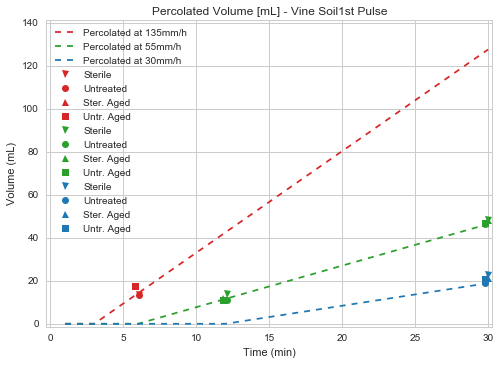

In [11]:
extract_and_plothydro(
    water_data,
    "Percolated at 135mm/h", "Percolated at 55mm/h", "Percolated at 30mm/h", "NA",
    title,
    soil,
    isFirstCycle = True,
    isPercolation = True
)

In [12]:
hydro1 = extract(
    water_data, 
    isFirstCycle = True
)

percol_data1 = hydro1[0]
runoff_data1 = hydro1[1]
time_sizes1 = hydro1[2]

## Transport - 1st pulse

### Computation transport - 1st pulse

#### Test factor X (Sterile)

In [13]:
x = 2

In [14]:
pest_sterile_1st = pest_linear_x(
    Kd_pest_sterile,
    x,
    initial_condition,
    pest_dict_S_1st,          
    pb_i1, pb_f1,
    percol_data1, runoff_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    isFirstCycle = True,
    isLiving = False,
    KFILM = True)

output_pesti_params = extract_goodness_pest(
        pest_sterile_1st,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = True)

1st Pulse
Sterile Vine
--------------------------------------------
Koc tested:  [ 369.  300.  250.  225.  200.  150.  125.  100.   75.   50.   30.]
Best Kd (Fresh):  7.554906 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  -2.8129247416 
 Effective Koc (fresh) - [cm3/g]: 184.5
--------------------------------------------
Best Kd (Aged):  2.0474 cm3/g ( Num:  8 ) 
 x factor: No factor considered.  
 R2:  0.110739734032 
 Effective Koc (aged) [cm3/g]: 100.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -67.6697109429 | 48.0104792498 | 148.5
(A) 135 mm/h - Aged  -58.049063337 | 46.7752943792 | 111.5
(B) 55 mm/h - Fresh  -68.3361323701 | 50.6938520755 | 160.1
(B) 55 mm/h - Aged  -42.6160256143 | 63.524059645 | 110.7
(C) 55 mm/h - Fresh  37.2970944681 | 258.530428883 | 188.3
(C) 55 mm/h - Aged  -12.7332973897 | 205.7

#### Test factor X (Living)

In [15]:
x = 2

In [16]:
pest_living_1st = pest_linear_x(
    Kd_pest_living,
    x,
    initial_condition,
    pest_dict_L_1st,          
    pb_i1, pb_f1,
    percol_data1, percol_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    KFILM = True,
    isFirstCycle = True,
    isLiving = True)


output_pesti_params = extract_goodness_pest(
        pest_living_1st,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = True)

1st Pulse
Living Vine
--------------------------------------------
Koc tested:  [ 369.  300.  250.  225.  200.  150.  125.  100.   75.   50.   30.]
Best Kd (Fresh):  4.2485 cm3/g ( Num:  3 ) 
 x factor:  2 
 R2:  -1.1430478224 
 Effective Koc (fresh) - [cm3/g]: 125.0
--------------------------------------------
Best Kd (Aged):  3.3988 cm3/g ( Num:  5 ) 
 x factor: No factor considered.  
 R2:  0.921213319368 
 Effective Koc (aged) [cm3/g]: 200.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -48.6365508298 | 57.4243361723 | 111.8
(A) 135 mm/h - Aged  -20.8302348761 | 29.4511526261 | 37.2
(B) 55 mm/h - Fresh  -30.7098964969 | 77.1198851989 | 111.3
(B) 55 mm/h - Aged  -49.2506364305 | 40.2442453106 | 79.3
(C) 55 mm/h - Fresh  -11.022133088 | 247.714381483 | 278.4
(C) 55 mm/h - Aged  16.1668410569 | 181.33643

#### Time series

In [17]:
data_stack = pest_sterile_1st['Data_stack']
sterile1 = extract_pest(data_stack)

mass_percol_sterile1 = sterile1[0]
mass_pond_sterile1 = sterile1[1]

In [18]:
data_stack = pest_living_1st['Data_stack']
living1 = extract_pest(data_stack)

mass_percol_living1 = living1[0]
mass_pond_living1 = living1[1]

## Plotting transport

### Sterile (1st Pulse, Crop Soil)

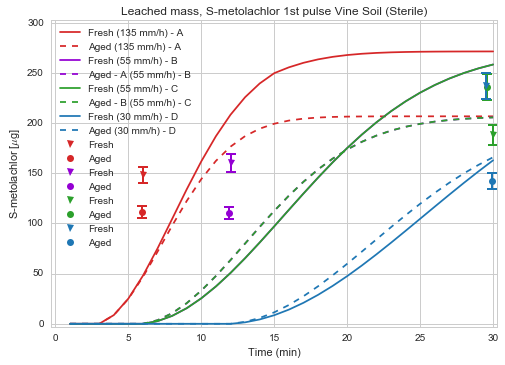

In [19]:
pestiplot_condition(
    mass_percol_sterile1,
    pest_dict_S_1st,
    pesticide,
    soil_type,
    cycle = '1st pulse',
    LEACH = True,
    STERILE = True
)

### Living (1st Pulse, Crop Soil)

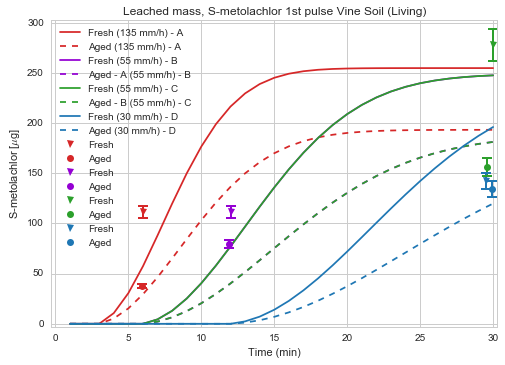

In [20]:
pestiplot_condition(
    mass_percol_living1,
    pest_dict_L_1st,
    pesticide,
    soil_type,
    cycle = '1st pulse',
    LEACH = True,
    STERILE = False
)

# Hydrology - 2nd pulse

### Inverse Ksat determination 

Based on hisotric rainfall pattern, fresh and aged.

In [21]:
water2_ktest = leachsim3(
    soil,
    kSat = [ kSat/5, kSat/10, kSat/15,
        kSat/25, kSat/50,  kSat/75, 
        kSat/100, kSat/125, kSat/150, 
        kSat/175, kSat/200, kSat/250,
        kSat/350, kSat/500, kSat/700, kSat/1000],
    soil_height=soil_height2,
    isFirstCycle = False
)

output_hydro_params = extract_goodness(
    water2_ktest,
    output_hydro_params,
    soil_short,
    isFirstCycle = False,
    isAGED = None
)

R2:  0.984388324547
--------------------------------------------
Sterile, Fresh Soil
ksat high:  0.35240000000000005 cm/h | Error % -12.5148211298
ksat med12:  0.01762 cm/h | Error % 128.69226691
ksat med30:  0.01762 cm/h | Error % 363.760286176
ksat low:  0.07048 cm/h | Error % 4.76959385113
--------------------------------------------
Sterile, Aged Soil
ksat high:  0.14096 cm/h | Error % -0.626720468252
ksat med12:  0.35240000000000005 cm/h | Error % -0.702170472638
ksat med30:  1.1746666666666667 cm/h | Error % -5.73433335983
ksat low:  0.7048000000000001 cm/h | Error % 9.70860633442
--------------------------------------------
Living, Fresh Soil
ksat high:  0.01762 cm/h | Error % inf
ksat med12:  0.03524 cm/h | Error % 3.53388184937
ksat med30:  0.17620000000000002 cm/h | Error % 2.28902480468
ksat low:  0.35240000000000005 cm/h | Error % -9.70964935858
--------------------------------------------
Living, Fresh Aged
ksat high:  0.11746666666666668 cm/h | Error % 2.32506552889
ksat 

### Percolation - 2nd pulse

In [22]:
title = "Percolated Volume [mL] - " + str(soil_type) +  " 2nd Pulse"

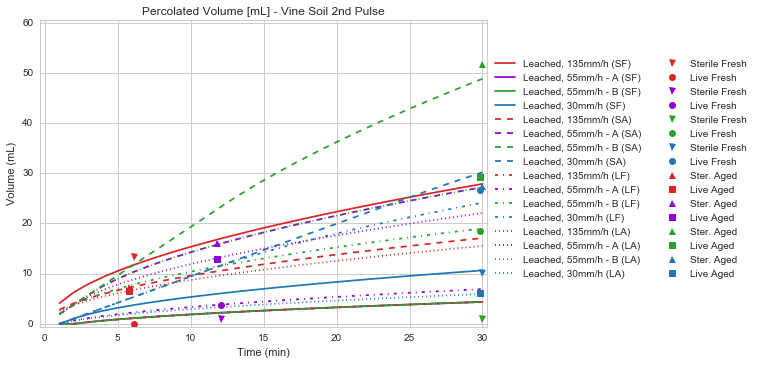

In [23]:
extract_and_plothydro(
    water2_ktest,
    "Leached, 135mm/h", "Leached, 55mm/h - A", "Leached, 55mm/h - B", "Leached, 30mm/h",
    title,
    soil,
    isFirstCycle = False,
    isPercolation = True
)

### Ponding - 2nd pulse

In [24]:
title = "Ponded Volume [mL] [mL] - " + str(soil_type) +  " 2nd Pulse"

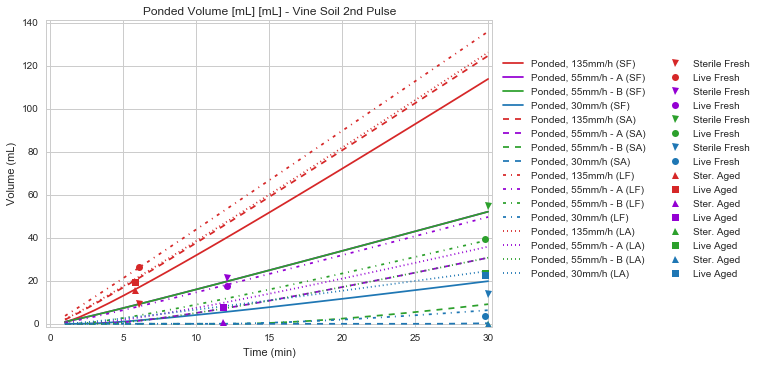

In [25]:
extract_and_plothydro(
    water2_ktest,
    "Ponded, 135mm/h", "Ponded, 55mm/h - A", "Ponded, 55mm/h - B", "Ponded, 30mm/h",
    title,
    soil,
    isFirstCycle = False,
    isPercolation = False
)

In [26]:
hydro2 = extract(
    water2_ktest,
    isFirstCycle = False
)
percol_data2 = hydro2[0]
runoff_data2 = hydro2[1]
time_sizes2 = hydro2[2]

## Transport - 2nd pulse

### Computation transport - 2nd Pulse

#### Kd optimal (sterile)

In [27]:
x = 2

In [28]:
pest_sterile_2nd = pest_linear_x(
    Kd_pest_sterile,
    x,
    initial_condition,
    pest_dict_S_2nd,
    pb_i2, pb_f2,
    percol_data2, runoff_data2,
    time_sizes2,
    area, soil_height2,
    d, runoff_vel,
    soil = "Alteck",
    isFirstCycle = False,
    isLiving = False)

output_pesti_params = extract_goodness_pest(
        pest_sterile_2nd,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = False)

2nd Pulse
Sterile Crop
--------------------------------------------
Koc tested:  [ 336.58139535  273.64341085  228.03617571  205.23255814  182.42894057
  136.82170543  114.01808786   91.21447028   68.41085271   45.60723514
   27.36434109]
Best Kd (Fresh):  7.554906 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  -0.640754877489 
 Effective Koc (fresh) - [cm3/g]: 168.290697674
--------------------------------------------
Best Kd (Aged):  4.0948 cm3/g ( Num:  5 ) 
 x factor: No factor considered.  
 R2:  0.925112083361 
 Effective Koc (aged) [cm3/g]: 182.428940568
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  No obs | 45.7726372726 | nan
(A) 135 mm/h - Aged  -64.2938113781 | 10.390500889 | 29.1
(B) 55 mm/h - Fresh  No obs | 12.6921367784 | nan
(B) 55 mm/h - Aged  -21.4740599557 | 32.2741613582 | 41.1
(C) 55 mm/h - 

#### Kd optimal (living)

In [29]:
x = 2

In [30]:
pest_living_2nd = pest_linear_x(
    Kd_pest_living,
    x,
    initial_condition,
    pest_dict_L_2nd,          
    pb_i1, pb_f1,
    percol_data2, runoff_data2,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil = "Alteck",
    KFILM = True,
    isFirstCycle = False,
    isLiving = True)

output_pesti_params = extract_goodness_pest(
        pest_living_2nd,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = False)

2nd Pulse
Living Crop
--------------------------------------------
Koc tested:  [ 196.21960073  159.52813067  132.94010889  119.646098    106.35208711
   79.76406534   66.47005445   53.17604356   39.88203267   26.58802178
   15.95281307]
Best Kd (Fresh):  6.270786 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  -0.108271793839 
 Effective Koc (fresh) - [cm3/g]: 98.109800363
--------------------------------------------
Best Kd (Aged):  6.270786 cm3/g ( Num:  1 ) 
 x factor: No factor considered.  
 R2:  0.615515970552 
 Effective Koc (aged) [cm3/g]: 196.219600726
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  No obs | 3.06419414889 | nan
(A) 135 mm/h - Aged  -54.3432681564 | 7.35073382682 | 16.1
(B) 55 mm/h - Fresh  No obs | 19.3550953561 | nan
(B) 55 mm/h - Aged  -13.0995994886 | 22.8548053345 | 26.3
(C) 55 mm/h -

#### Time series

In [31]:
data_stack = pest_sterile_2nd['Data_stack']
sterile2 = extract_pest(data_stack)

data_stack = pest_living_2nd['Data_stack']
living2 = extract_pest(data_stack)

mass_percol_sterile2 = sterile2[0]
mass_pond_sterile2 = sterile2[1]

mass_percol_living2 = living2[0]
mass_pond_living2 = living2[1]

## Plotting transport 

### Sterile (2nd Pulse)

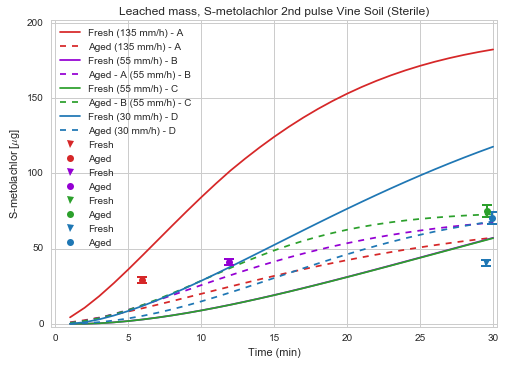

In [32]:
pestiplot_condition(
    mass_percol_sterile2,
    pest_dict_S_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = True,
    STERILE = True
)

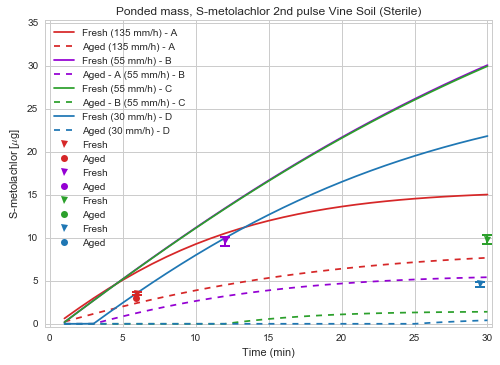

In [33]:
pestiplot_condition(
    mass_pond_sterile2,
    pest_dict_S_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = False,
    STERILE = True
)

### Living (2nd Pulse)

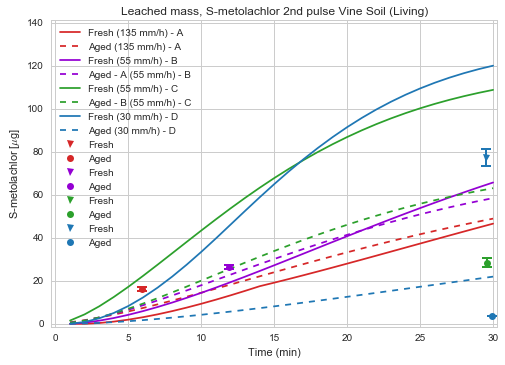

In [34]:
pestiplot_condition(
    mass_percol_living2,
    pest_dict_L_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = True,
    STERILE = False
)

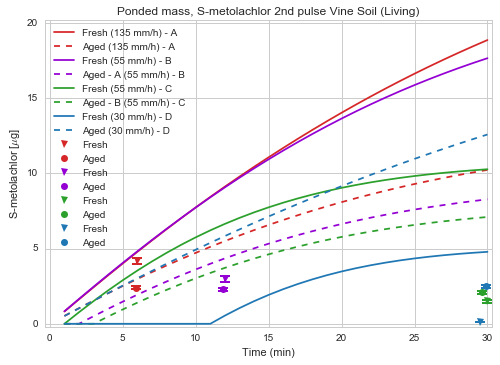

In [35]:
pestiplot_condition(
    mass_pond_living2,
    pest_dict_L_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = False,
    STERILE = False
)

END NOTEBOOK

### Max values

In [36]:
initial_condition = 'max'

#### 1st Pulse

In [37]:
Kd1_SF = output_pesti_params[soil_short]['Kd1']['SF']*10**3  # Convert back to mm3/g (model units)
Kd1_SA = output_pesti_params[soil_short]['Kd1']['SA']*10**3
Kd1_choice_sterile = [Kd1_SF, Kd1_SA]

Kd1_LF = output_pesti_params[soil_short]['Kd1']['LF']*10**3
Kd1_LA = output_pesti_params[soil_short]['Kd1']['LA']*10**3
Kd1_choice_living = [Kd1_LF, Kd1_LA]

In [38]:
max_sterile_1st = pest_Kd_choice(
    Kd1_choice_sterile,
    x,
    initial_condition,
    pest_dict_S_1st,          
    pb_i1, pb_f1,
    percol_data1, runoff_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    isFirstCycle = True,
    isLiving = False,
    KFILM = True)

output_pesti_params = extract_goodness_maxmin(
        max_sterile_1st,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = True)


1st Pulse
Sterile Vine
--------------------------------------------
Koc tested:  [ 369.  100.]
Best Kd (Fresh):  7.554906 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  -4.06922553116 
 Effective Koc (fresh) - [cm3/g]: 184.5
--------------------------------------------
Best Kd (Aged):  2.0474 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  -6.62128805479 
 Effective Koc (aged) [cm3/g]: 100.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -55.4705155813 | 66.1262843618 | 148.5
(A) 135 mm/h - Aged  -16.0926295979 | 93.5567179983 | 111.5
(B) 55 mm/h - Fresh  -56.3883979579 | 69.8221748694 | 160.1
(B) 55 mm/h - Aged  14.7754681286 | 127.056443218 | 110.7
(C) 55 mm/h - Fresh  89.1034385141 | 356.081774722 | 188.3
(C) 55 mm/h - Aged  74.544840286 | 411.576733394 | 235.8
(D) 30 mm/h - Fresh  -5.42125933525 |

In [39]:
max_living_1st = pest_Kd_choice(
    Kd1_choice_living,
    x,
    initial_condition,
    pest_dict_L_1st,          
    pb_i1, pb_f1,
    percol_data1, runoff_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    isFirstCycle = True,
    isLiving = False,
    KFILM = True)

output_pesti_params = extract_goodness_maxmin(
        max_living_1st,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = True)

1st Pulse
Sterile Vine
--------------------------------------------
Koc tested:  [ 207.50708215  166.00566572]
Best Kd (Fresh):  4.2485 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  -36.5635862294 
 Effective Koc (fresh) - [cm3/g]: 103.753541076
--------------------------------------------
Best Kd (Aged):  3.3988 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  -1.24674780706 
 Effective Koc (aged) [cm3/g]: 166.005665722
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  32.257858728 | 147.864286058 | 111.8
(A) 135 mm/h - Aged  59.7493046617 | 59.4267413342 | 37.2
(B) 55 mm/h - Fresh  41.5887669724 | 157.58829764 | 111.3
(B) 55 mm/h - Aged  3.75136741462 | 82.2748343598 | 79.3
(C) 55 mm/h - Fresh  88.4699974821 | 524.70047299 | 278.4
(C) 55 mm/h - Aged  149.18122152 | 388.971886793 | 156.1
(D) 30 mm/h - F

#### 2ndPulse Pulse

In [40]:
Kd2_SF = output_pesti_params[soil_short]['Kd2']['SF']*10**3
Kd2_SA = output_pesti_params[soil_short]['Kd2']['SA']*10**3
Kd2_choice_sterile = [Kd2_SF, Kd2_SA]

Kd2_LF = output_pesti_params[soil_short]['Kd2']['LF']*10**3
Kd2_LA = output_pesti_params[soil_short]['Kd2']['LA']*10**3
Kd2_choice_living = [Kd2_LF, Kd2_LA]

In [41]:
max_sterile_2nd = pest_Kd_choice(
    Kd2_choice_sterile,
    x,
    initial_condition,
    pest_dict_S_2nd,          
    pb_i2, pb_f2,
    percol_data2, runoff_data2,
    time_sizes2,
    area, soil_height2, 
    d, runoff_vel,
    soil,
    isFirstCycle = False,
    isLiving = False)

output_pesti_params = extract_goodness_maxmin(
        max_sterile_2nd,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = False)

2nd Pulse
Sterile Vine
--------------------------------------------
Koc tested:  [ 369.  200.]
Best Kd (Fresh):  7.554906 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  -3.14654912649 
 Effective Koc (fresh) - [cm3/g]: 184.5
--------------------------------------------
Best Kd (Aged):  4.0948 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  0.716144521654 
 Effective Koc (aged) [cm3/g]: 200.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  No obs | 63.6973314638 | nan
(A) 135 mm/h - Aged  -50.2090244739 | 14.4891738781 | 29.1
(B) 55 mm/h - Fresh  No obs | 17.6211768263 | nan
(B) 55 mm/h - Aged  9.33071351928 | 44.9349232564 | 41.1
(C) 55 mm/h - Fresh  No obs | 78.5757364323 | nan
(C) 55 mm/h - Aged  37.8773594348 | 93.1273556347 | 74.7
(D) 30 mm/h - Fresh  303.084670133 | 251.62044136 | 40.5
(D) 30 mm/h

In [42]:
max_living_2nd = pest_Kd_choice(
    Kd2_choice_living,
    x,
    initial_condition,
    pest_dict_L_2nd,          
    pb_i2, pb_f2,
    percol_data2, runoff_data2,
    time_sizes2,
    area, soil_height2, 
    d, runoff_vel,
    soil,
    isFirstCycle = False,
    isLiving = True)

output_pesti_params = extract_goodness_maxmin(
        max_living_2nd,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = False)

2nd Pulse
Living Vine
--------------------------------------------
Koc tested:  [ 369.  369.]
Best Kd (Fresh):  6.270786 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  -3.66267906518 
 Effective Koc (fresh) - [cm3/g]: 184.5
--------------------------------------------
Best Kd (Aged):  6.270786 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  0.0508246300464 
 Effective Koc (aged) [cm3/g]: 369.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  No obs | 3.23453854613 | nan
(A) 135 mm/h - Aged  -39.3223914336 | 9.76909497919 | 16.1
(B) 55 mm/h - Fresh  No obs | 25.9654180412 | nan
(B) 55 mm/h - Aged  15.9052793649 | 30.483088473 | 26.3
(C) 55 mm/h - Fresh  No obs | 150.961491164 | nan
(C) 55 mm/h - Aged  201.279398585 | 78.7451101355 | 28.5
(D) 30 mm/h - Fresh  113.992803231 | 59.5248393024 | 77.2
(D) 30 mm

### Min values

In [43]:
initial_condition = 'min'

#### 1st Pulse

In [44]:
min_sterile_1st = pest_Kd_choice(
    Kd1_choice_sterile,
    x,
    initial_condition,
    pest_dict_S_1st,          
    pb_i1, pb_f1,
    percol_data1, runoff_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    isFirstCycle = True,
    isLiving = False,
    KFILM = True)

output_pesti_params = extract_goodness_maxmin(
        min_sterile_1st,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = True)

1st Pulse
Sterile Vine
--------------------------------------------
Koc tested:  [ 369.  100.]
Best Kd (Fresh):  7.554906 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  -4.83689285233 
 Effective Koc (fresh) - [cm3/g]: 184.5
--------------------------------------------
Best Kd (Aged):  2.0474 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  -10.3963327252 
 Effective Koc (aged) [cm3/g]: 100.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -79.8689063045 | 29.8946741378 | 148.5
(A) 135 mm/h - Aged  -100.005497076 | -0.00612923991079 | 111.5
(B) 55 mm/h - Fresh  -80.2838667822 | 31.5655292817 | 160.1
(B) 55 mm/h - Aged  -100.007519357 | -0.00832392840791 | 110.7
(C) 55 mm/h - Fresh  -14.509249578 | 160.979083045 | 188.3
(C) 55 mm/h - Aged  -100.011435066 | -0.0269638845253 | 235.8
(D) 30 mm/h - Fresh  -5

In [45]:
min_living_1st = pest_Kd_choice(
    Kd1_choice_living,
    x,
    initial_condition,
    pest_dict_L_1st,          
    pb_i1, pb_f1,
    percol_data1, runoff_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    isFirstCycle = True,
    isLiving = False,
    KFILM = True)

output_pesti_params = extract_goodness_maxmin(
        min_living_1st,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = True)

1st Pulse
Sterile Vine
--------------------------------------------
Koc tested:  [ 207.50708215  166.00566572]
Best Kd (Fresh):  4.2485 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  -31.8053989495 
 Effective Koc (fresh) - [cm3/g]: 103.753541076
--------------------------------------------
Best Kd (Aged):  3.3988 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  -0.620028547486 
 Effective Koc (aged) [cm3/g]: 166.005665722
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -99.9918121799 | 0.00915398291698 | 111.8
(A) 135 mm/h - Aged  -100.008142581 | -0.00302904028412 | 37.2
(B) 55 mm/h - Fresh  -99.9912345219 | 0.00975597707177 | 111.3
(B) 55 mm/h - Aged  -100.005288311 | -0.00419363037667 | 79.3
(C) 55 mm/h - Fresh  -99.9883321985 | 0.0324831593506 | 278.4
(C) 55 mm/h - Aged  -100.012701015 | -0.0198262

#### 2nd Pulse

In [46]:
min_sterile_2nd = pest_Kd_choice(
    Kd2_choice_sterile,
    x,
    initial_condition,
    pest_dict_S_2nd,          
    pb_i2, pb_f2,
    percol_data2, runoff_data2,
    time_sizes2,
    area, soil_height2, 
    d, runoff_vel,
    soil,
    isFirstCycle = False,
    isLiving = False)

output_pesti_params = extract_goodness_maxmin(
        min_sterile_2nd,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = False)

2nd Pulse
Sterile Vine
--------------------------------------------
Koc tested:  [ 369.  200.]
Best Kd (Fresh):  7.554906 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  0.982065347585 
 Effective Koc (fresh) - [cm3/g]: 184.5
--------------------------------------------
Best Kd (Aged):  4.0948 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  0.0949554602608 
 Effective Koc (aged) [cm3/g]: 200.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  No obs | 19.3643652522 | nan
(A) 135 mm/h - Aged  -85.0438448194 | 4.35224115756 | 29.1
(B) 55 mm/h - Fresh  No obs | 5.34402781591 | nan
(B) 55 mm/h - Aged  -67.1453491477 | 13.5032615003 | 41.1
(C) 55 mm/h - Fresh  No obs | 23.6638458398 | nan
(C) 55 mm/h - Aged  -61.6961716243 | 27.9854274768 | 74.7
(D) 30 mm/h - Fresh  19.9327419815 | 76.4941013925 | 40.5
(D) 30 

In [47]:
min_living_2nd = pest_Kd_choice(
    Kd2_choice_living,
    x,
    initial_condition,
    pest_dict_L_2nd,          
    pb_i2, pb_f2,
    percol_data2, runoff_data2,
    time_sizes2,
    area, soil_height2, 
    d, runoff_vel,
    soil,
    isFirstCycle = False,
    isLiving = True)

output_pesti_params = extract_goodness_maxmin(
        min_living_2nd,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = False)

2nd Pulse
Living Vine
--------------------------------------------
Koc tested:  [ 369.  369.]
Best Kd (Fresh):  6.270786 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  0.555203293871 
 Effective Koc (fresh) - [cm3/g]: 184.5
--------------------------------------------
Best Kd (Aged):  6.270786 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  0.882196640209 
 Effective Koc (aged) [cm3/g]: 369.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  No obs | 0.992639229577 | nan
(A) 135 mm/h - Aged  -81.2607630785 | 3.01701714437 | 16.1
(B) 55 mm/h - Fresh  No obs | 7.97011578633 | nan
(B) 55 mm/h - Aged  -64.717702938 | 9.27924412731 | 26.3
(C) 55 mm/h - Fresh  No obs | 42.8850466533 | nan
(C) 55 mm/h - Aged  -10.8563850728 | 23.9705074972 | 28.5
(D) 30 mm/h - Fresh  -35.2079268322 | 18.2674251004 | 77.2
(D) 30

### Hydrology summary

In [48]:
import pprint

### R-squared

In [49]:
# 1st pulse
output_hydro_params[soil_short][0]['R1_FA']

[0.97167044953232651, 0.98950154118247413]

In [50]:
# 2nd pulse 
output_hydro_params[soil_short][0]['R2_ALL']

[0.98438832454669278]

### Percent error

In [51]:
# 1st pulse
pprint.pprint(output_hydro_params[soil_short][0]['Err1'][0])

{'Aged': [-9.9497695760673803,
          -3.8366274590119529,
          -0.19171628147268441,
          -10.681750947175953],
 'Fresh': [-1.6576800420983793,
           55.714529041314499,
           4.5496322475756381,
           1.1782456331323563]}


In [52]:
# 2nd pulse
pprint.pprint(output_hydro_params[soil_short][0]['Err2'][0])

{'LA': [2.3250655288884485,
        1.775964240154662,
        -6.8151479703231335,
        -4.0853015171098992],
 'LF': [inf, 3.5338818493703803, 2.2890248046824371, -9.7096493585817267],
 'SA': [-0.62672046825181538,
        -0.70217047263768517,
        -5.7343333598281507,
        9.7086063344151547],
 'SF': [-12.514821129777932,
        128.69226690973363,
        363.76028617624922,
        4.7695938511324218]}


## Transport 

### Summary tables

0. High rainfall intensity (135 mm/h) at 6 min.
1. Medium rainfall intensity (55 mm/h) at 12 min.
2. Medium rainfall intensity (55 mm/h) at 30 min.
3. Low rainfall intensity (30 mm/h) at 30 min.

    a) LA : Living Aged

    b) LF : Living Fresh

    c) SA : Sterile Aged

    d) SF : Sterile Fresh
    
   
To compute max and min simualtions, the optimal Kd values obtained from the mean scenario were used. That is, the model has not been fitted to consider these extreme uncertainty scenarios.

- max: initial calculated concentration + measurement error

- min: initial calculated concentraion - measurement error

 

In [53]:
import pandas as pd

### Percent error

In [54]:
pd.DataFrame.from_dict(output_pesti_params[soil_short]['Err1'], orient='columns')

,LA,LAmax,LAmin,LF,LFmax,LFmin,SA,SAmax,SAmin,SF,SFmax,SFmin
0,-20.830235,59.749305,-100.008143,-48.636551,32.257859,-99.991812,-58.049063,-16.092630,-100.005497,-67.669711,-55.470516,-79.868906
1,-49.250636,3.751367,-100.005288,-30.709896,41.588767,-99.991235,-42.616026,14.775468,-100.007519,-68.336132,-56.388398,-80.283867
2,16.166841,149.181222,-100.012701,-11.022133,88.469997,-99.988332,-12.733297,74.544840,-100.011435,37.297094,89.103439,-14.509250
3,-10.981775,90.559560,-100.009713,38.169157,194.387191,-99.981775,16.295324,132.605887,-100.015239,-31.331834,-5.421259,-57.242409


In [55]:
pd.DataFrame.from_dict(output_pesti_params[soil_short]['Err2'], orient='columns')

,LA,LAmax,LAmin,LF,LFmax,LFmin,SA,SAmax,SAmin,SF,SFmax,SFmin
0,-54.343268,-39.322391,-81.260763,No obs,No obs,No obs,-64.293811,-50.209024,-85.043845,No obs,No obs,No obs
1,-13.099599,15.905279,-64.717703,No obs,No obs,No obs,-21.474060,9.330714,-67.145349,No obs,No obs,No obs
2,121.388481,201.279399,-10.856385,No obs,No obs,No obs,-2.530945,37.877359,-61.696172,No obs,No obs,No obs
3,545.460580,763.452019,157.674637,55.5754,113.993,-35.2079,-3.070127,35.597385,-59.983008,190.652,303.085,19.9327


### R-squared & Sorption parameters 

In [56]:
# 1st and 2nd Pulse
df = pd.DataFrame.from_dict(output_pesti_params[soil_short], orient='columns') 
df2 = df[['R1', 'R2', 'Kd1', 'Kd2', 'Koc1', 'Koc2']].dropna(axis=0)
df2

,R1,R2,Kd1,Kd2,Koc1,Koc2
LA,0.921213,0.615516,3.398800,6.270786,200.0,196.219601
LF,-1.143048,-0.108272,4.248500,6.270786,125.0,98.109800
SA,0.110740,0.925112,2.047400,4.094800,100.0,182.428941
SF,-2.812925,-0.640755,7.554906,7.554906,184.5,168.290698


In [57]:
path = '..\ModelParameters\\' + str(soil_short) + str(pesticide) + '.csv'
df2.to_csv(path, sep=';')